<a href="https://colab.research.google.com/github/RicardoMenna/-RicardoMenna-Find-a-repository-MachineLearning_TP3/blob/main/TPN%C2%B03_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico N°3**

*Ejercicio 1: K vecinos más cercanos*

In [157]:
"""Importaciones"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

Creo los conjuntos con distribución normal

In [158]:
"""Creación de dos conjuntos con distintos valores de media y desvío estandar"""
#Parámetros
n = 100
med_A = 5 
ds_A = 10
med_B = 5
ds_B = 10

#Creación del primer Dataframe 
valores_A= np.random.normal(med_A, ds_A, n)
valores_B = np.random.normal(med_B, ds_B, n)
df_1 = pd.DataFrame({"X": valores_A, "Y": valores_B,"Etiqueta":"1"})

#Cambio los valores de media y desvío para el segundo Dataframe
med_A = 20 
ds_A = 10
med_B = 20
ds_B = 10

valores_A= np.random.normal(med_A, ds_A, n)
valores_B = np.random.normal(med_B, ds_B, n)
df_2 = pd.DataFrame({"X": valores_A, "Y": valores_B, "Etiqueta":"2"})



Se muestran los grupos de datos

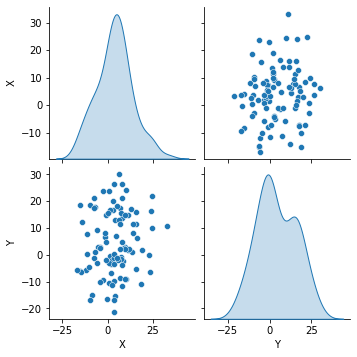

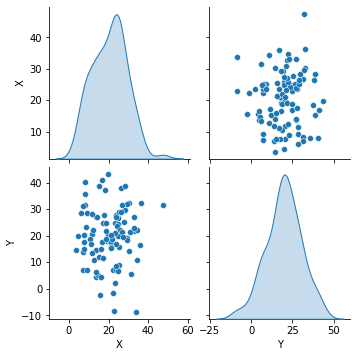

In [159]:
sns.pairplot(df_1, diag_kind="kde")

sns.pairplot(df_2, diag_kind="kde")

Concateno ambos Dataframes

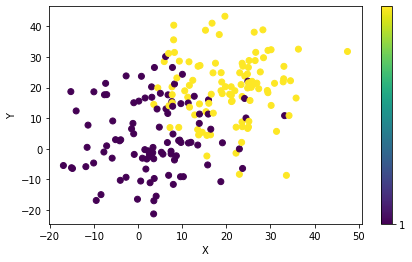

In [160]:
"""Concateno ambos DataFrames y ordeno en forma creciente"""
df = df_1.append(df_2,ignore_index='true')
df = df.sort_values("X")  #Ordeno los valores en forma creciente
plt.figure(figsize=(7, 4))
plt.scatter(df.X, df.Y, c = [df.Etiqueta])
plt.colorbar(ticks=[0, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Comienzo el entrenamiento.

In [161]:
# Importo la función para dividir los datos
X_train, X_test, y_train, y_test = train_test_split(df.values[:,:2], df.Etiqueta, train_size = 0.5)   

knn = KNeighborsClassifier(n_neighbors = 10, leaf_size=30)                   # Creo el clasificador
knn.fit(X_train, y_train)                                                    # Lo entreno con esos datos

# Ahora me fijo si entreno bien o no
print("Exactitud (accurracy) en el entrenamiento:"  + str(knn.score(X_train, y_train)))

Exactitud (accurracy) en el entrenamiento:0.77


Realizo Testeo

In [162]:
#Testeo con valores conocidos para saber en que etiqueta las coloca
valores_prueba=[[35,30],[2,10]]         #Por los valores que uso. Debería predecir que [35,30] pertenece a la Etiqueta 2 y [2,10] a la etiqueta 1
testeo = knn.predict(valores_prueba)

print("Según la predicción el valor" + str(valores_prueba[0]) + " pertenece a la etiqueta: "+ str(testeo[0])+".\n"+
      "Mientras que el valor "+ str(valores_prueba[1]) + " pertenece a la etiqueta: "+ str(testeo[1]))

Según la predicción el valor[35, 30] pertenece a la etiqueta: 2.
Mientras que el valor [2, 10] pertenece a la etiqueta: 1


Ahora usando los valores del Datasets, realizo una predicción de las etiquetas.

In [163]:
#Coloco los valores de X e Y del dataframe y realizo la predicción
valores_pred= df[["X","Y"]].values
y_pred = knn.predict(valores_pred)
df["Predicción"]=y_pred
df

,X,Y,Etiqueta,Predicción
97,-16.912162,-5.500213,1,1
13,-15.225721,18.655575,1,1
43,-15.071281,-6.219485,1,1
49,-14.854711,-6.464956,1,1
2,-14.023824,12.343593,1,1
...,...,...,...,...
127,34.214080,10.830072,2,2
154,34.545489,22.212669,2,2
191,35.808949,16.555044,2,2
116,36.335830,32.536139,2,2


Finalmente hago la matriz de confusión.

In [164]:
#Matriz de confusión 4 cuadrantes   verdadero positivo , falso positivo ...... falso negativo , verdadero negativo.
print("Matriz de Confusión: ")
print(confusion_matrix(df["Etiqueta"], y_pred))
print()


Matriz de Confusión: 
[[82 18]
 [15 85]]



Realizo un nuevo entrenamiento cambiando el valor de vecinos cercanos. Primero con un valor menor y luego con uno mayor y observo el valor de exactitud y la matriz de consusión.

In [165]:
#Valor de n_neighbors menor que antes
knn = KNeighborsClassifier(n_neighbors = 5, leaf_size=30)                   # Creo el clasificador
knn.fit(X_train, y_train)                                                    # Lo entreno con esos datos

# Ahora me fijo si entreno bien o no
print("Exactitud (accurracy) en el entrenamiento:"  + str(knn.score(X_train, y_train)))

#Coloco los valores de X e Y del dataframe y realizo la predicción
valores_pred= df[["X","Y"]].values
y_pred = knn.predict(valores_pred)
df["Predicción"]=y_pred

#Matriz de confusión 4 cuadrantes   verdadero positivo , falso positivo ...... falso negativo , verdadero negativo.
print("Matriz de Confusión: ")
print(confusion_matrix(df["Etiqueta"], y_pred))
print()


#Valor de n-neighbors mayor que antes
knn = KNeighborsClassifier(n_neighbors = 20, leaf_size=30)                   # Creo el clasificador
knn.fit(X_train, y_train)                                                    # Lo entreno con esos datos

# Ahora me fijo si entreno bien o no
print("Exactitud (accurracy) en el entrenamiento:"  + str(knn.score(X_train, y_train)))

#Coloco los valores de X e Y del dataframe y realizo la predicción
valores_pred= df[["X","Y"]].values
y_pred = knn.predict(valores_pred)
df["Predicción"]=y_pred

#Matriz de confusión 4 cuadrantes   verdadero positivo , falso positivo ...... falso negativo , verdadero negativo.
print("Matriz de Confusión: ")
print(confusion_matrix(df["Etiqueta"], y_pred))
print()


Exactitud (accurracy) en el entrenamiento:0.84
Matriz de Confusión: 
[[79 21]
 [10 90]]

Exactitud (accurracy) en el entrenamiento:0.76
Matriz de Confusión: 
[[79 21]
 [13 87]]





* Se puede observar que al variar la cantidad de vecinos cercanos, cambia la exactitud de la predicción. Viendo que a menor cantidad de vecinos mayor es el porcentaje de exactitud.

